# Modelling

This notebook contains model training, data engineering and selection processes.



### Import Necessary Libraries

In [1]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
# from sklearn.metrics import classification_report

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import SGDClassifier

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier

# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC


# import timeit
# import warnings
# warnings.filterwarnings("ignore")

from functions import *

### Load dfs

In [2]:
# import libraries form csv files into pandas df
df = pd.read_csv('data_for_model.csv', usecols = ['review_rating' , 'Reviews_tokenize_join'])
df.head()

,review_rating,Reviews_tokenize_join
0,1,start say understand hard time city country en...
1,5,wonderful visit time park view thank upgrade l...
2,5,good hotel stay absolutely worth money view ce...
3,5,fantastic location spot step central park view...
4,5,amazing park view nicole staff professional fr...


In [3]:
# optimazation memory by converting the review_rating to category
df['target'] = df['review_rating'].astype('category')

In [4]:
# plot
df['review_rating'].plot.hist(bins=12, alpha=0.5)

In [5]:

df['target'].value_counts(normalize = True)


5    0.474172
4    0.264351
3    0.122715
1    0.069501
2    0.069261
Name: target, dtype: float64

In [6]:
#df.info()
# df['target'] = df['review_rating'].apply(lambda x: str(x))

In [7]:
# df['target'] = df['review_rating'].astype('category')

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25050 entries, 0 to 25049
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   review_rating          25050 non-null  int64   
 1   Reviews_tokenize_join  25050 non-null  object  
 2   target                 25050 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 416.2+ KB


,review_rating,Reviews_tokenize_join,target
0,1,start say understand hard time city country en...,1
1,5,wonderful visit time park view thank upgrade l...,5
2,5,good hotel stay absolutely worth money view ce...,5
3,5,fantastic location spot step central park view...,5
4,5,amazing park view nicole staff professional fr...,5


## Data Engineering and Modelling




I am going to implement different classifiers to see which works best:

- Logistic Regression
- Decision Tree
- Random Forest
- Ada Boots
- Gradient Boosting
- XGB
- Linear Support Vector Classification
- Multinomial Naive Bayes

In [9]:
# def clf(model ,col1,col):
#     start = timeit.timeit()
#     """It takes two columns and a classifier, split the data into traing and testing, vectorize it, remove irrlevant features using and implemnt a ca
#     classifier using a pipeline, return a dictionary with accuracy, precions and recall f_1 socre and running time"""

#     X_train, X_test, y_train, y_test = train_test_split(df[col1], df[col] , test_size=0.3, random_state = 42)

#     classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                          ('chi',  SelectKBest(chi2, k=10000)),
#                    ('clf', model)])

#     classification_model.fit(X_train, y_train)
    
#     preds = classification_model.predict(X_test)
#     end = timeit.timeit()
#     final_time = start - end

#     list_names = ['Model','Accuracy_score','Recall_score','Precision_score','F1_score', 'Time']
#     score_list = []
#     accuracy = accuracy_score(y_test, preds)
#     recall = recall_score(y_test, preds,average=None, pos_label='Good')
#     precision = precision_score(y_test, preds,average=None, pos_label='Good')
#     f_1 = f1_score(y_test , preds,average=None, pos_label='Good')
#     final_time = start - end

#     score_list.extend([model,accuracy,recall,precision,f_1,final_time])
#     dictionary = dict(zip(list_names, score_list))
#     return dictionary

### Logistic Regresion 

In [10]:
lg_multi_class = clf(LogisticRegression() , df ,'Reviews_tokenize_join', 'target')


In [11]:
lg_multi_class

{'Accuracy_score': '60.0%',
 'Recall_score': array([0.54420432, 0.03214286, 0.24946004, 0.39164619, 0.90588235]),
 'Precision_score': array([0.57708333, 0.3       , 0.37806874, 0.47412255, 0.67414051]),
 'F1_score': array([0.56016178, 0.05806452, 0.30058556, 0.42895587, 0.77301665]),
 'Time': -0.0005950670000007818}

### Mutinomial NB

In [12]:
nb_multi_class = clf(MultinomialNB(), df, 'Reviews_tokenize_join', 'target')

In [13]:
nb_multi_class

{'Accuracy_score': '47.0%',
 'Recall_score': array([0.01178782, 0.        , 0.00647948, 0.03587224, 0.99827834]),
 'Precision_score': array([1.        , 0.        , 0.09230769, 0.11908646, 0.50929586]),
 'F1_score': array([0.02330097, 0.        , 0.01210898, 0.05513595, 0.67448623]),
 'Time': 0.0004324299999982628}

### Decision Tree Classifier

In [14]:
dt_multi_class = clf(DecisionTreeClassifier(), df, 'Reviews_tokenize_join', 'target')

In [15]:
dt_multi_class

{'Accuracy_score': '46.0%',
 'Recall_score': array([0.31827112, 0.15535714, 0.22354212, 0.35872236, 0.64878049]),
 'Precision_score': array([0.35840708, 0.23641304, 0.23820483, 0.33843301, 0.61624421]),
 'F1_score': array([0.3371488 , 0.1875    , 0.23064067, 0.34828244, 0.63209393]),
 'Time': 0.002336108000001502}

### AdaBoots

In [16]:
ab_multi_class = clf(AdaBoostClassifier(), df, 'Reviews_tokenize_join', 'target')

In [17]:
ab_multi_class 

{'Accuracy_score': '55.00000000000001%',
 'Recall_score': array([0.45383104, 0.14285714, 0.19006479, 0.33366093, 0.84878049]),
 'Precision_score': array([0.4822547 , 0.2962963 , 0.34174757, 0.43442099, 0.6309727 ]),
 'F1_score': array([0.46761134, 0.19277108, 0.24427481, 0.37743191, 0.72384681]),
 'Time': 0.004257544999997975}

### Gradient_boosting


In [18]:
gb_multi_class = clf(GradientBoostingClassifier(), df, 'Reviews_tokenize_join', 'target')

In [19]:
gb_multi_class

{'Accuracy_score': '56.99999999999999%',
 'Recall_score': array([0.43222004, 0.08571429, 0.16414687, 0.35380835, 0.90731707]),
 'Precision_score': array([0.56265985, 0.31578947, 0.38190955, 0.4400978 , 0.64034022]),
 'F1_score': array([0.48888889, 0.13483146, 0.22960725, 0.39226369, 0.75080138]),
 'Time': 0.0016139790000053722}

### XGB


In [20]:
xgb_multi_class = clf(XGBClassifier(), df, 'Reviews_tokenize_join', 'target')

In [21]:
xgb_multi_class 

{'Accuracy_score': '55.00000000000001%',
 'Recall_score': array([0.40471513, 0.06964286, 0.09287257, 0.28796069, 0.92969871]),
 'Precision_score': array([0.56749311, 0.375     , 0.35684647, 0.42188625, 0.59800664]),
 'F1_score': array([0.47247706, 0.11746988, 0.14738646, 0.34228972, 0.72784455]),
 'Time': 0.0034709439999858205}

### Linear Support Vector Classification

In [22]:
svc_multi_class = clf(LinearSVC(),df, 'Reviews_tokenize_join', 'target')

In [23]:
svc_multi_class

{'Accuracy_score': '61.0%',
 'Recall_score': array([0.58742633, 0.14464286, 0.35529158, 0.40884521, 0.87058824]),
 'Precision_score': array([0.53680431, 0.34913793, 0.40220049, 0.49701314, 0.71658007]),
 'F1_score': array([0.56097561, 0.20454545, 0.37729358, 0.44863845, 0.78611219]),
 'Time': 0.0027122570000130963}

### Random Forest Classifier

In [24]:
rf_multi_class = clf(RandomForestClassifier(),df, 'Reviews_tokenize_join', 'target')

In [25]:
rf_multi_class 

{'Accuracy_score': '52.0%',
 'Recall_score': array([0.32220039, 0.09642857, 0.15658747, 0.34987715, 0.80344333]),
 'Precision_score': array([0.4969697 , 0.40909091, 0.26703499, 0.36178862, 0.61646852]),
 'F1_score': array([0.3909416 , 0.15606936, 0.19741321, 0.3557332 , 0.69764545]),
 'Time': 0.0037929649999739468}

### Results Summary


In [143]:
l= [lg_multi_class, dt_multi_class, rf_multi_class, ab_multi_class, gb_multi_class, xgb_multi_class, svc_multi_class, nb_multi_class]
df_results_multi = table_results(l)
df_results_multi.loc[: , ['Accuracy_score', 'Time']]
df_results_multi.sort_values(by='Accuracy_score', ascending=False)

,Accuracy_score,Recall_score,Precision_score,F1_score,Time
Model,,,,,
Support Vector Machine,61.0%,"[0.587426326129666, 0.14464285714285716, 0.355...","[0.5368043087971275, 0.34913793103448276, 0.40...","[0.5609756097560975, 0.20454545454545456, 0.37...",0.002712
Logistic Regresion,60.0%,"[0.5442043222003929, 0.03214285714285714, 0.24...","[0.5770833333333333, 0.3, 0.3780687397708674, ...","[0.5601617795753286, 0.058064516129032254, 0.3...",-0.000595
Gradient_boosting,56.99999999999999%,"[0.43222003929273084, 0.08571428571428572, 0.1...","[0.5626598465473146, 0.3157894736842105, 0.381...","[0.48888888888888893, 0.1348314606741573, 0.22...",0.001614
Ada Boots,55.00000000000001%,"[0.4538310412573674, 0.14285714285714285, 0.19...","[0.4822546972860125, 0.2962962962962963, 0.341...","[0.4676113360323887, 0.1927710843373494, 0.244...",0.004258
XGB,55.00000000000001%,"[0.40471512770137524, 0.06964285714285715, 0.0...","[0.5674931129476584, 0.375, 0.3568464730290456...","[0.4724770642201835, 0.1174698795180723, 0.147...",0.003471
Random Forest Classifier,52.0%,"[0.32220039292730845, 0.09642857142857143, 0.1...","[0.49696969696969695, 0.4090909090909091, 0.26...","[0.39094159713945176, 0.15606936416184972, 0.1...",0.003793
Mutinomial NB,47.0%,"[0.011787819253438114, 0.0, 0.0064794816414686...","[1.0, 0.0, 0.09230769230769231, 0.119086460032...","[0.023300970873786405, 0.0, 0.0121089808274470...",0.000432
Decision Tree Classifier,46.0%,"[0.3182711198428291, 0.15535714285714286, 0.22...","[0.3584070796460177, 0.23641304347826086, 0.23...","[0.3371488033298647, 0.1875, 0.230640668523676...",0.002336


In [29]:
df_metrix_multi = unnest_df(df_results_multi)
df_metrix_multi

,Recall_score,Precision_score,F1_score,target_class,model
0,0.544204,0.577083,0.560162,1,Logistic Regresion
1,0.032143,0.300000,0.058065,2,Logistic Regresion
2,0.249460,0.378069,0.300586,3,Logistic Regresion
3,0.391646,0.474123,0.428956,4,Logistic Regresion
4,0.905882,0.674141,0.773017,5,Logistic Regresion
5,0.318271,0.358407,0.337149,1,Decision Tree Classifier
6,0.155357,0.236413,0.187500,2,Decision Tree Classifier
7,0.223542,0.238205,0.230641,3,Decision Tree Classifier
8,0.358722,0.338433,0.348282,4,Decision Tree Classifier
9,0.648780,0.616244,0.632094,5,Decision Tree Classifier


## Hyperparameters tunning in classifiers

### Logistic Regresion with GridSearchCV 

In [30]:
lg_multi_grid = clf_grid(LogisticRegression(),df ,'Reviews_tokenize_join', 'target',parameteres = {'clf__C':[0.01, 0.1, 1, 10, 100] })

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
                ('clf',
          

In [32]:
lg_multi_grid

{'Accuracy_score': '61.0%',
 'Recall_score': array([0.5481336 , 0.15714286, 0.39416847, 0.42948403, 0.86054519]),
 'Precision_score': array([0.5625    , 0.34509804, 0.42491269, 0.50432776, 0.71883988]),
 'F1_score': array([0.55522388, 0.21595092, 0.40896359, 0.46390658, 0.78333551]),
 'Time': 6.499899998857472e-05}

### Multinomial NB

In [33]:
nb_muti_grid = clf_grid(MultinomialNB(),df,'Reviews_tokenize_join', 'target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
               

In [34]:
nb_muti_grid 

{'Accuracy_score': '60.0%',
 'Recall_score': array([0.3870334 , 0.0125    , 0.31533477, 0.45503686, 0.876901  ]),
 'Precision_score': array([0.63961039, 0.25      , 0.30575916, 0.46230654, 0.72399905]),
 'F1_score': array([0.48225214, 0.02380952, 0.31047315, 0.45864289, 0.7931482 ]),
 'Time': 0.00046563300003299446}

### Decision Tree Classifier

In [35]:
dt_multi_grid = clf_grid(DecisionTreeClassifier(),df,'Reviews_tokenize_join', 'target',parameteres = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 3, 4]
})

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=6, max_features=None,


In [37]:
dt_multi_grid

{'Accuracy_score': '51.0%',
 'Recall_score': array([0.33005894, 0.00714286, 0.02159827, 0.21670762, 0.91305595]),
 'Precision_score': array([0.45901639, 0.44444444, 0.23529412, 0.35737439, 0.54664147]),
 'F1_score': array([0.384     , 0.01405975, 0.03956479, 0.26980728, 0.68385988]),
 'Time': -0.0015780099998323749}

### Random Forest Classifier

In [38]:
rf_multi_grid = clf_grid(RandomForestClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {
    'clf__n_estimators': [10, 30, 100],
    'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 6, 10],
#     'clf__min_samples_split': [5, 10],
    'clf__min_samples_leaf': [3, 6]
})

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
               

In [39]:
rf_multi_grid

{'Accuracy_score': '53.0%',
 'Recall_score': array([0.34381139, 0.02678571, 0.06587473, 0.18181818, 0.95753228]),
 'Precision_score': array([0.59726962, 0.44117647, 0.31443299, 0.3507109 , 0.5618791 ]),
 'F1_score': array([0.43640898, 0.05050505, 0.10892857, 0.2394822 , 0.70819185]),
 'Time': 0.00048820799975146656}

### AdaBoots

In [ ]:
## tengo qie volver a correr ADA GRAdien ADN XBR

In [41]:
ab_multi_grid = clf_grid(AdaBoostClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {
 'clf__n_estimators': [50, 100],
 'clf__learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
)

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
                ('clf',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1, n_estimators=100,
          

In [42]:
ab_multi_grid 

{'Accuracy_score': '56.99999999999999%',
 'Recall_score': array([0.50884086, 0.25357143, 0.24514039, 0.37395577, 0.83615495]),
 'Precision_score': array([0.51084813, 0.35588972, 0.38215488, 0.45541592, 0.67081031]),
 'F1_score': array([0.50984252, 0.29614181, 0.29868421, 0.41068538, 0.7444118 ]),
 'Time': 0.0008413089999521617}

### Gradient_boosting


In [46]:
gb_multi_grid = clf_grid(GradientBoostingClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {'clf__learning_rate': [0.1, 0.05],
              'clf__max_depth': [4, 6, 8],
              'clf__min_samples_leaf': [20, 50,100]
              #'max_features': [1.0, 0.3, 0.1] 
              })

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=8, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                            

In [14]:
gb_multi_grid

{'Accuracy_score': '56.00000000000001%',
 'Recall_score': array([0.5540275 , 0.13035714, 0.20518359, 0.32579853, 0.85710187]),
 'Precision_score': array([0.4661157 , 0.29435484, 0.33868093, 0.44526528, 0.64765828]),
 'F1_score': array([0.50628366, 0.18069307, 0.25554808, 0.37627696, 0.73780412]),
 'Time': 0.0002060620000037261}

### XGB


In [49]:
xgb_multi_grid = clf_grid(XGBClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {
#         'clf__min_child_weight': [1, 5, 10],
        'clf__gamma': [0.5, 1, 1.5, 2, 5],
#         'clf__subsample': [0.6, 0.8, 1.0],
        'clf__colsample_bytree': [0.6, 0.8, 1.0],
#         'clf__max_depth': [3, 4, 5]
        })

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, gamma=1, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child

In [50]:
xgb_multi_grid

{'Accuracy_score': '56.00000000000001%',
 'Recall_score': array([0.42436149, 0.0625    , 0.13066955, 0.26830467, 0.9420373 ]),
 'Precision_score': array([0.5440806 , 0.29411765, 0.41016949, 0.44864421, 0.59832331]),
 'F1_score': array([0.47682119, 0.10309278, 0.1981982 , 0.33579336, 0.73183237]),
 'Time': -1.6893999600142706e-05}

### Linear Support Vector Classification 

In [52]:
svc_multi_grid = clf_grid(LinearSVC(),df, 'Reviews_tokenize_join', 'target' ,parameteres = {'clf__C':[0.001,0.1,10,100,10e5] ,'clf__max_iter':[1000 ,2000,3000]})

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
               

In [53]:
svc_multi_grid

{'Accuracy_score': '60.0%',
 'Recall_score': array([0.60707269, 0.04285714, 0.23218143, 0.36511057, 0.91994261]),
 'Precision_score': array([0.5459364 , 0.4       , 0.39814815, 0.47935484, 0.66805584]),
 'F1_score': array([0.57488372, 0.07741935, 0.29331514, 0.41450488, 0.77402221]),
 'Time': 0.002095768999424763}

### Results Summary


In [144]:
l= [lg_multi_grid, dt_multi_grid, rf_multi_grid, ab_multi_grid, gb_multi_grid, xgb_multi_grid, svc_multi_grid,nb_muti_grid]
df_results_multi_grid = table_results(l)
df_results_multi_grid.loc[: , ['Accuracy_score', 'Time']]
df_results_multi_grid.sort_values(by='Accuracy_score', ascending=False)

,Accuracy_score,Recall_score,Precision_score,F1_score,Time
Model,,,,,
Logistic Regresion,61.0%,"[0.5481335952848723, 0.15714285714285714, 0.39...","[0.5625, 0.34509803921568627, 0.42491268917345...","[0.5552238805970149, 0.21595092024539875, 0.40...",0.000065
Support Vector Machine,60.0%,"[0.6070726915520629, 0.04285714285714286, 0.23...","[0.5459363957597173, 0.4, 0.39814814814814814,...","[0.5748837209302325, 0.07741935483870968, 0.29...",0.002096
Mutinomial NB,60.0%,"[0.38703339882121807, 0.0125, 0.31533477321814...","[0.6396103896103896, 0.25, 0.3057591623036649,...","[0.4822521419828641, 0.023809523809523808, 0.3...",0.000466
Gradient_boosting,59.0%,"[0.5756385068762279, 0.14285714285714285, 0.26...","[0.5204262877442274, 0.35874439461883406, 0.4,...","[0.5466417910447761, 0.20434227330779053, 0.31...",0.000192
Ada Boots,56.99999999999999%,"[0.5088408644400786, 0.25357142857142856, 0.24...","[0.5108481262327417, 0.3558897243107769, 0.382...","[0.5098425196850395, 0.2961418143899896, 0.298...",0.000841
XGB,56.00000000000001%,"[0.4243614931237721, 0.0625, 0.130669546436285...","[0.5440806045340051, 0.29411764705882354, 0.41...","[0.4768211920529801, 0.10309278350515463, 0.19...",-0.000017
Random Forest Classifier,53.0%,"[0.343811394891945, 0.026785714285714284, 0.06...","[0.5972696245733788, 0.4411764705882353, 0.314...","[0.43640897755610975, 0.050505050505050504, 0....",0.000488
Decision Tree Classifier,51.0%,"[0.3300589390962672, 0.007142857142857143, 0.0...","[0.45901639344262296, 0.4444444444444444, 0.23...","[0.38400000000000006, 0.014059753954305799, 0....",-0.001578


In [35]:
df_metrix_multi_grid = unnest_df(df_results_multi_grid)

In [36]:
df_metrix_multi_grid

,Recall_score,Precision_score,F1_score,target_class,model
0,0.548134,0.562500,0.555224,1,Logistic Regresion
1,0.157143,0.345098,0.215951,2,Logistic Regresion
2,0.394168,0.424913,0.408964,3,Logistic Regresion
3,0.429484,0.504328,0.463907,4,Logistic Regresion
4,0.860545,0.718840,0.783336,5,Logistic Regresion
5,0.330059,0.459016,0.384000,1,Decision Tree Classifier
6,0.007143,0.444444,0.014060,2,Decision Tree Classifier
7,0.021598,0.229885,0.039487,3,Decision Tree Classifier
8,0.216708,0.357955,0.269972,4,Decision Tree Classifier
9,0.913056,0.546641,0.683860,5,Decision Tree Classifier


## Change target to 3 categories


First model needs to be improved.
There are a lot more 4, 5 stars than 1, 2, 3 stars,
Set 1, 2, 3 stars to 'Bad', 4 stars to 'Neutral', 5 stars to 'Good'

In [68]:
# df_tree_categories = df.replace({5: 'good', 4: 'neutral', 3: 'bad' , 2: 'bad', 1: 'bad'})
# df_tree_categories.head()
df['tri_target'] = 'Bad'
df.loc[df['review_rating'] == 5, 'tri_target'] = 'Good'
df.loc[df['review_rating'] == 4, 'tri_target'] = 'Neutral'

In [69]:
df['tri_target'].value_counts()

Good       11878
Neutral     6622
Bad         6550
Name: tri_target, dtype: int64

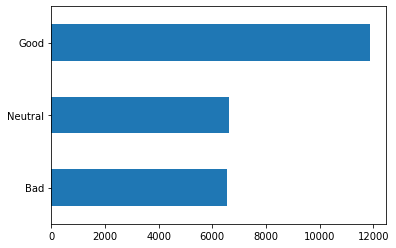

In [70]:
# df_tree_categories['target'].plot.bar(bins=12, alpha=0.5)
df['tri_target'].value_counts().sort_values().plot(kind = 'barh')


###  Logistic Regressiom

In [71]:
ld_tri_class = clf( LogisticRegression(),df, 'Reviews_tokenize_join', 'tri_target')


In [72]:
ld_tri_class 

{'Accuracy_score': '72.0%',
 'Recall_score': array([0.81954887, 0.88579627, 0.32432432]),
 'Precision_score': array([0.80225711, 0.71491431, 0.56945643]),
 'F1_score': array([0.81081081, 0.79123414, 0.41327489]),
 'Time': 0.00031451100039703306}

### Decision Tree Classifier

In [73]:
dt_tri_class = clf(DecisionTreeClassifier(),df, 'Reviews_tokenize_join', 'tri_target')

In [74]:
dt_tri_class

{'Accuracy_score': '53.0%',
 'Recall_score': array([0.51027569, 0.65566714, 0.34299754]),
 'Precision_score': array([0.60523187, 0.61112597, 0.33333333]),
 'F1_score': array([0.55371227, 0.63261351, 0.33809639]),
 'Time': 0.00038546399991901126}

### Mutinomial NB

In [75]:
nb_tri_class = clf(MultinomialNB(),df,'Reviews_tokenize_join', 'tri_target')

In [76]:
nb_tri_class

{'Accuracy_score': '65.0%',
 'Recall_score': array([0.68120301, 0.98479197, 0.05995086]),
 'Precision_score': array([0.87283237, 0.60210526, 0.47286822]),
 'F1_score': array([0.7652027 , 0.74730539, 0.10641082]),
 'Time': 0.0019083080005657393}

### Linear Support Vector Classification

In [78]:
svc_tri_class = clf(LinearSVC(), df,'Reviews_tokenize_join', 'tri_target')

In [79]:
svc_tri_class

{'Accuracy_score': '71.0%',
 'Recall_score': array([0.83408521, 0.84964132, 0.36117936]),
 'Precision_score': array([0.78676123, 0.7369338 , 0.53183792]),
 'F1_score': array([0.80973236, 0.78928429, 0.43020193]),
 'Time': 3.718899824889377e-05}

### Random Forest Classifier

In [80]:
rf_tri_class = clf(RandomForestClassifier(),df, 'Reviews_tokenize_join', 'tri_target')

In [81]:
rf_tri_class

{'Accuracy_score': '62.0%',
 'Recall_score': array([0.64862155, 0.86341463, 0.18918919]),
 'Precision_score': array([0.74754477, 0.62182269, 0.40740741]),
 'F1_score': array([0.69457864, 0.72296973, 0.25838926]),
 'Time': -0.0007984959993336815}

### AdaBoots

In [82]:
ab_tri_class = clf(AdaBoostClassifier(), df, 'Reviews_tokenize_join', 'target')

In [83]:
ab_multi_class 

{'Accuracy_score': '55.00000000000001%',
 'Recall_score': array([0.45383104, 0.14285714, 0.19006479, 0.33366093, 0.84878049]),
 'Precision_score': array([0.4822547 , 0.2962963 , 0.34174757, 0.43442099, 0.6309727 ]),
 'F1_score': array([0.46761134, 0.19277108, 0.24427481, 0.37743191, 0.72384681]),
 'Time': 0.004257544999997975}

### Gradient_boosting


In [84]:
gb_tri_class = clf(GradientBoostingClassifier(), df, 'Reviews_tokenize_join', 'target')

In [85]:
gb_tri_class

{'Accuracy_score': '56.99999999999999%',
 'Recall_score': array([0.44400786, 0.09464286, 0.1663067 , 0.33955774, 0.91391679]),
 'Precision_score': array([0.5472155 , 0.31736527, 0.39285714, 0.46282652, 0.63069307]),
 'F1_score': array([0.49023861, 0.14580468, 0.23368741, 0.39172336, 0.74633861]),
 'Time': 0.0005064600009063724}

### XGB


In [86]:
xgb_tri_class = clf(XGBClassifier(), df, 'Reviews_tokenize_join', 'target')

In [87]:
xgb_tri_class 

{'Accuracy_score': '56.00000000000001%',
 'Recall_score': array([0.42632613, 0.0625    , 0.12850972, 0.26977887, 0.94146341]),
 'Precision_score': array([0.54385965, 0.2892562 , 0.41319444, 0.45222405, 0.59730566]),
 'F1_score': array([0.47797357, 0.10279001, 0.19604613, 0.33795014, 0.73089775]),
 'Time': 0.0021844049988430925}

### Results Summary


### Results Summary


In [145]:
l= [ld_tri_class, dt_tri_class, rf_tri_class, ab_tri_class, gb_tri_class, xgb_tri_class, svc_tri_class,nb_tri_class]
df_results_tri = table_results(l)
df_results_tri.loc[: , ['Accuracy_score', 'Time']]
df_results_tri.sort_values(by='Accuracy_score', ascending=False)

,Accuracy_score,Recall_score,Precision_score,F1_score,Time
Model,,,,,
Logistic Regresion,72.0%,"[0.8195488721804511, 0.8857962697274031, 0.324...","[0.8022571148184494, 0.7149143121815655, 0.569...","[0.8108108108108109, 0.7912341407151096, 0.413...",0.000315
Support Vector Machine,71.0%,"[0.8340852130325814, 0.8496413199426112, 0.361...","[0.7867612293144208, 0.7369337979094077, 0.531...","[0.8097323600973235, 0.7892842862854857, 0.430...",0.000037
Mutinomial NB,65.0%,"[0.681203007518797, 0.9847919655667144, 0.0599...","[0.8728323699421965, 0.6021052631578947, 0.472...","[0.7652027027027029, 0.7473053892215569, 0.106...",0.001908
Random Forest Classifier,62.0%,"[0.6486215538847118, 0.8634146341463415, 0.189...","[0.7475447718082033, 0.6218226906385617, 0.407...","[0.6945786366076221, 0.7229697260932244, 0.258...",-0.000798
Gradient_boosting,56.99999999999999%,"[0.444007858546169, 0.09464285714285714, 0.166...","[0.5472154963680388, 0.31736526946107785, 0.39...","[0.490238611713666, 0.14580467675378267, 0.233...",0.000506
Ada Boots,56.00000000000001%,"[0.5540275049115914, 0.13035714285714287, 0.20...","[0.46611570247933887, 0.29435483870967744, 0.3...","[0.5062836624775584, 0.18069306930693071, 0.25...",0.002429
XGB,56.00000000000001%,"[0.4263261296660118, 0.0625, 0.128509719222462...","[0.543859649122807, 0.2892561983471074, 0.4131...","[0.4779735682819383, 0.1027900146842878, 0.196...",0.002184
Decision Tree Classifier,53.0%,"[0.5102756892230577, 0.6556671449067432, 0.342...","[0.6052318668252081, 0.6111259695105643, 0.333...","[0.5537122654337776, 0.6326135105204872, 0.338...",0.000385


In [51]:
df_metrix_tri = unnest_df(df_results_tri)

## Tunning hyperparameters

### Loigistic Regression

In [89]:
lg_tri_grid = clf_grid(LogisticRegression(),df,'Reviews_tokenize_join', 'tri_target', parameteres ={'clf__penalty' : ['l1', 'l2'],
'clf__C' : [ 0.001, 0.01, 0.1, 1, 10, 100],
'clf__solver': ['liblinear', 'saga']})

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
                ('clf',
          

In [ ]:
lg_tri_grid

### Decision Tree Classifier

In [90]:
dt_tri_grid = clf_grid( DecisionTreeClassifier(),df,'Reviews_tokenize_join', 'tri_target', parameteres = {
    'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 5, 10]
#     'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
})

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=Non

In [91]:
dt_tri_grid

{'Accuracy_score': '46.0%',
 'Recall_score': array([0.31827112, 0.13928571, 0.23434125, 0.35429975, 0.6553802 ]),
 'Precision_score': array([0.3793911 , 0.19796954, 0.2424581 , 0.34025484, 0.62065217]),
 'F1_score': array([0.34615385, 0.16352201, 0.23833059, 0.34713529, 0.63754361]),
 'Time': -0.0007338849973166361}

### Multinomial NB

In [92]:
nb_tri_grid = clf_grid( MultinomialNB(), df,'Reviews_tokenize_join', 'tri_target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
               

In [94]:
nb_tri_grid

{'Accuracy_score': '60.0%',
 'Recall_score': array([0.3870334 , 0.0125    , 0.31533477, 0.45503686, 0.876901  ]),
 'Precision_score': array([0.63961039, 0.25      , 0.30575916, 0.46230654, 0.72399905]),
 'F1_score': array([0.48225214, 0.02380952, 0.31047315, 0.45864289, 0.7931482 ]),
 'Time': 0.0008555969998269575}

### Linear Support Vector Classification

In [95]:
svc_tri_grid = clf_grid( LinearSVC() ,df, 'Reviews_tokenize_join', 'tri_target',parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})


 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
               

In [ ]:
svc_tri_grid

### Random Forest Classifier

In [96]:
rf_tri_grid = clf_grid( RandomForestClassifier(), df,'Reviews_tokenize_join', 'tri_target', parameteres = {
#     'clf__n_estimators': [10, 30, 100],
    'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 6, 10],
    'clf__min_samples_split': [5, 10],
    'clf__min_samples_leaf': [3, 6]
})

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
               

In [ ]:
rf_tri_grid

### AdaBoots

In [128]:
ab_tri_grid = clf_grid(AdaBoostClassifier(), df, 'Reviews_tokenize_join', 'tri_target', parameteres = {
 'clf__n_estimators': [50, 100],
 'clf__learning_rate' : [0.01,0.05,0.1,0.3,1]
#  'clf__loss' : ['linear', 'square', 'exponential']
 }
)

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x1a19e2c950>)),
               

In [129]:
ab_tri_grid

{'Accuracy_score': '56.99999999999999%',
 'Recall_score': array([0.4675835 , 0.18392857, 0.23542117, 0.395086  , 0.83041607]),
 'Precision_score': array([0.47695391, 0.29855072, 0.36515913, 0.44916201, 0.67553688]),
 'F1_score': array([0.47222222, 0.22762431, 0.28627708, 0.42039216, 0.74501223]),
 'Time': 0.0014256920039770193}

### Gradient_boosting


In [130]:
gb_tri_grid = clf_grid(GradientBoostingClassifier(), df, 'Reviews_tokenize_join', 'tritarget', parameteres = {'clf__learning_rate': [0.1, 0.05, 0.02, 0.01],
              'clf__max_depth': [4, 6, 8],
#               'clf__min_samples_leaf': [20, 50,100,150],
              'clf__max_features': [1.0, 0.3, 0.1] 
              })

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=8, max_features=0.1,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=

In [14]:
gb_tri_grid

{'Accuracy_score': '56.00000000000001%',
 'Recall_score': array([0.5540275 , 0.13035714, 0.20518359, 0.32579853, 0.85710187]),
 'Precision_score': array([0.4661157 , 0.29435484, 0.33868093, 0.44526528, 0.64765828]),
 'F1_score': array([0.50628366, 0.18069307, 0.25554808, 0.37627696, 0.73780412]),
 'Time': 0.0002060620000037261}

### XGB


In [103]:
xgb_tri_grid = clf_grid(XGBClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {
#         'clf__min_child_weight': [1, 5, 10],
        'clf__gamma': [0.5, 1, 1.5, 2, 5],
#         'clf__subsample': [0.6, 0.8, 1.0],
#         'clf__colsample_bytree': [0.6, 0.8, 1.0],
        'clf__max_depth': [3, 4, 5]
        })

 Best parameter Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.5, learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
      

In [104]:
xgb_tri_grid

{'Accuracy_score': '56.99999999999999%',
 'Recall_score': array([0.49115914, 0.07678571, 0.1587473 , 0.33562654, 0.91248207]),
 'Precision_score': array([0.56053812, 0.36134454, 0.38181818, 0.43754004, 0.63549161]),
 'F1_score': array([0.52356021, 0.12665685, 0.22425629, 0.37986652, 0.74920485]),
 'Time': 0.0011933329988096375}

### Results Summary


In [146]:
l= [lg_tri_grid, dt_tri_grid, rf_tri_grid, ab_tri_grid, gb_tri_grid, xgb_tri_grid, svc_tri_grid,nb_tri_grid]
df_results_tri_grid = table_results(l)
df_results_tri_grid.loc[: , ['Accuracy_score', 'Time']]
df_results_tri_grid.sort_values(by='Accuracy_score', ascending=False)

,Accuracy_score,Recall_score,Precision_score,F1_score,Time
Model,,,,,
Logistic Regresion,61.0%,"[0.5481335952848723, 0.15714285714285714, 0.39...","[0.5625, 0.34509803921568627, 0.42491268917345...","[0.5552238805970149, 0.21595092024539875, 0.40...",0.000322
Support Vector Machine,60.0%,"[0.6070726915520629, 0.04285714285714286, 0.23...","[0.5459363957597173, 0.4, 0.39814814814814814,...","[0.5748837209302325, 0.07741935483870968, 0.29...",0.000088
Mutinomial NB,60.0%,"[0.38703339882121807, 0.0125, 0.31533477321814...","[0.6396103896103896, 0.25, 0.3057591623036649,...","[0.4822521419828641, 0.023809523809523808, 0.3...",0.000856
Gradient_boosting,57.99999999999999%,"[0.47544204322200395, 0.1125, 0.22462203023758...","[0.5761904761904761, 0.31343283582089554, 0.35...","[0.5209903121636168, 0.16557161629434955, 0.27...",-0.006089
Ada Boots,56.99999999999999%,"[0.4675834970530452, 0.18392857142857144, 0.23...","[0.47695390781563124, 0.2985507246376812, 0.36...","[0.4722222222222222, 0.22762430939226522, 0.28...",0.001426
XGB,56.99999999999999%,"[0.4911591355599214, 0.07678571428571429, 0.15...","[0.5605381165919282, 0.36134453781512604, 0.38...","[0.5235602094240838, 0.12665684830633284, 0.22...",0.001193
Random Forest Classifier,52.0%,"[0.2829076620825147, 0.026785714285714284, 0.0...","[0.5625, 0.29411764705882354, 0.29508196721311...","[0.3764705882352941, 0.049099836333878884, 0.1...",0.002694
Decision Tree Classifier,46.0%,"[0.3182711198428291, 0.1392857142857143, 0.234...","[0.3793911007025761, 0.19796954314720813, 0.24...","[0.34615384615384615, 0.16352201257861637, 0.2...",-0.000734


In [58]:
df_metrix_tri_grid = unnest_df(df_results_tri_grid)

## Change target to 2 categories


The last model is not bad but I think It can improve if I implement binary classification.
Divide the df into 5 stars as Good and the rest as Bad.

In [131]:
df['bi_target'] = 'Bad'
df.loc[df['review_rating'] == 5, 'bi_target'] = 'Good'


In [132]:
df.bi_target.value_counts(normalize = True)
df.head()

,review_rating,Reviews_tokenize_join,target,tri_target,bi_target
0,1,start say understand hard time city country en...,1,Bad,Bad
1,5,wonderful visit time park view thank upgrade l...,5,Good,Good
2,5,good hotel stay absolutely worth money view ce...,5,Good,Good
3,5,fantastic location spot step central park view...,5,Good,Good
4,5,amazing park view nicole staff professional fr...,5,Good,Good


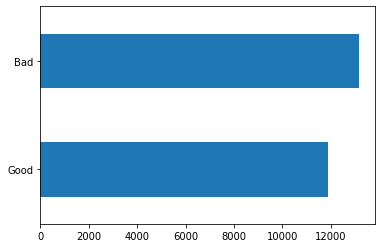

In [133]:
df['bi_target'].value_counts().sort_values().plot(kind = 'barh')


## Data Engineering and Modelling


### Logistic Regression

In [134]:
lg_bi_class = clf(LogisticRegression(),df, 'Reviews_tokenize_join', 'bi_target')

In [135]:
lg_bi_class

{'Accuracy_score': '80.0%',
 'Recall_score': array([0.79950372, 0.81119082]),
 'Precision_score': array([0.83041237, 0.77771664]),
 'F1_score': array([0.81466498, 0.79410112]),
 'Time': 0.0024842090060701594}

### Decision Tree Classifier

In [111]:
dt_bi_class = clf(DecisionTreeClassifier(),df,  'Reviews_tokenize_join', 'bi_target')

In [112]:
dt_bi_class

{'Accuracy_score': '64.0%',
 'Recall_score': array([0.62258065, 0.66226686]),
 'Precision_score': array([0.68068367, 0.60276835]),
 'F1_score': array([0.65033696, 0.6311184 ]),
 'Time': 5.3526993724517524e-05}

### Multinoial NB

In [113]:
nb_bi_class = clf(MultinomialNB(),df,  'Reviews_tokenize_join', 'bi_target')

In [114]:
nb_bi_class

{'Accuracy_score': '80.0%',
 'Recall_score': array([0.79578164, 0.81377331]),
 'Precision_score': array([0.83169087, 0.77507516]),
 'F1_score': array([0.8133401 , 0.79395297]),
 'Time': 0.0008715799995115958}

### Linear Support Vector Classification

In [115]:
svc_bi_class = clf(LinearSVC(),df, 'Reviews_tokenize_join', 'bi_target')

In [116]:
svc_bi_class

{'Accuracy_score': '81.0%',
 'Recall_score': array([0.79404467, 0.81779053]),
 'Precision_score': array([0.83441982, 0.77445652]),
 'F1_score': array([0.81373172, 0.79553385]),
 'Time': 0.001911829000164289}

### Random Forest Classifier

In [117]:
rf_bi_class = clf( RandomForestClassifier(),df, 'Reviews_tokenize_join', 'bi_target')

In [118]:
rf_bi_class

{'Accuracy_score': '74.0%',
 'Recall_score': array([0.76054591, 0.7061693 ]),
 'Precision_score': array([0.74957202, 0.71833041]),
 'F1_score': array([0.75501909, 0.71219795]),
 'Time': 0.0020161990105407313}

### AdaBoots

In [123]:
ab_bi_class = clf(AdaBoostClassifier(), df, 'Reviews_tokenize_join', 'bi_target')

In [124]:
ab_bi_class 

{'Accuracy_score': '76.0%',
 'Recall_score': array([0.74665012, 0.77733142]),
 'Precision_score': array([0.79498018, 0.72627346]),
 'F1_score': array([0.77005758, 0.75093555]),
 'Time': 0.0012753449991578236}

### Gradient_boosting


In [125]:
gb_bi_class = clf(GradientBoostingClassifier(), df, 'Reviews_tokenize_join', 'bi_target')

In [126]:
gb_bi_class

{'Accuracy_score': '77.0%',
 'Recall_score': array([0.74739454, 0.78880918]),
 'Precision_score': array([0.8036286 , 0.72975843]),
 'F1_score': array([0.77449216, 0.75813569]),
 'Time': 0.0026241989980917424}

### XGB


In [127]:
xgb_bi_class = clf(XGBClassifier(), df, 'Reviews_tokenize_join', 'bi_target')

In [16]:
xgb_bi_class 

{'Accuracy_score': '56.00000000000001%',
 'Recall_score': array([0.42632613, 0.0625    , 0.12850972, 0.26977887, 0.94146341]),
 'Precision_score': array([0.54385965, 0.2892562 , 0.41319444, 0.45222405, 0.59730566]),
 'F1_score': array([0.47797357, 0.10279001, 0.19604613, 0.33795014, 0.73089775]),
 'Time': 0.00040448300001116877}

### Results Summary


In [147]:
l= [lg_bi_class, dt_bi_class, rf_bi_class, ab_bi_class, gb_bi_class,xgb_bi_class , svc_bi_class,nb_bi_class]
df_results_bi = table_results(l)
df_results_bi.loc[: , ['Accuracy_score', 'Time']]
df_results_bi.sort_values(by='Accuracy_score', ascending=False)

,Accuracy_score,Recall_score,Precision_score,F1_score,Time
Model,,,,,
Support Vector Machine,81.0%,"[0.794044665012407, 0.8177905308464849]","[0.834419817470665, 0.7744565217391305]","[0.813731722822632, 0.7955338450802513]",0.001912
Logistic Regresion,80.0%,"[0.7995037220843673, 0.8111908177905308]","[0.8304123711340207, 0.777716643741403]","[0.8146649810366625, 0.7941011235955057]",0.002484
Mutinomial NB,80.0%,"[0.7957816377171216, 0.8137733142037302]","[0.8316908713692946, 0.7750751571467615]","[0.8133400963733199, 0.7939529675251961]",0.000872
Gradient_boosting,77.0%,"[0.747394540942928, 0.7888091822094692]","[0.8036286019210246, 0.7297584284576586]","[0.7744921573669324, 0.7581356867071153]",0.002624
XGB,77.0%,"[0.7429280397022332, 0.7925394548063127]","[0.8054882970137207, 0.7272248551869405]","[0.7729443655608623, 0.7584786489084169]",0.001530
Ada Boots,76.0%,"[0.746650124069479, 0.7773314203730273]","[0.7949801849405548, 0.7262734584450402]","[0.7700575815738964, 0.750935550935551]",0.001275
Random Forest Classifier,74.0%,"[0.760545905707196, 0.7061692969870875]","[0.7495720224993886, 0.7183304144775248]","[0.7550190910210618, 0.7121979453045869]",0.002016
Decision Tree Classifier,64.0%,"[0.6225806451612903, 0.6622668579626972]","[0.6806836679327184, 0.6027683468268478]","[0.6503369621565578, 0.6311184030626197]",0.000054


In [140]:
df_metrix_bi = unnest_df(df_results_bi)
df_metrix_bi

,Recall_score,Precision_score,F1_score,target_class,model
0,0.799504,0.830412,0.814665,1,Logistic Regresion
1,0.811191,0.777717,0.794101,2,Logistic Regresion
2,0.622581,0.680684,0.650337,3,Logistic Regresion
3,0.662267,0.602768,0.631118,4,Logistic Regresion
4,0.760546,0.749572,0.755019,5,Logistic Regresion
5,0.706169,0.718330,0.712198,1,Decision Tree Classifier
6,0.746650,0.794980,0.770058,2,Decision Tree Classifier
7,0.777331,0.726273,0.750936,3,Decision Tree Classifier
8,0.747395,0.803629,0.774492,4,Decision Tree Classifier
9,0.788809,0.729758,0.758136,5,Decision Tree Classifier


## Tunning hyperparameters

### Logistic Regression

In [79]:
lg_bi_grid = clf_grid(LogisticRegression(),df,'Reviews_tokenize_join', 'bi_target', parameteres ={'clf__penalty' : ['l1', 'l2'],
'clf__C' : [ 0.001, 0.01, 0.1, 1, 10, 100],
'clf__solver': ['liblinear', 'saga']})

In [ ]:
lg_bi_grid

### Decision Tree Classifier

In [80]:
dt_bi_grid = clf_grid( DecisionTreeClassifier(),df, 'Reviews_tokenize_join', 'bi_target', parameteres = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
})

In [ ]:
dt_bi_grid

### Multinomial NB

In [81]:
nb_bi_grid = clf_grid( MultinomialNB(),df,'Reviews_tokenize_join', 'bi_target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

In [ ]:
nb_bi_grid 

### Linear Support Vector Classification

In [83]:
svc_bi_grid = clf_grid( LinearSVC() ,df, 'Reviews_tokenize_join', 'bi_target',parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})
                                                                                                       


In [ ]:
svc_bi_grid

### Random Forest Classifier

In [ ]:
rf_bi_grid = clf_grid( RandomForestClassifier(),df, 'Reviews_tokenize_join', 'bi_target', parameteres = {
#     'clf__n_estimators': [10, 30, 100],
#     'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 6, 10],
#     'clf__min_samples_split': [5, 10],
#     'clf__min_samples_leaf': [3, 6]
# })

In [85]:
rf_bi_grid = clf_grid( RandomForestClassifier(),df, 'Reviews_tokenize_join', 'bi_target', parameteres = {
     'clf__n_estimators': [10, 30, 100]})

In [ ]:
rf_bi_grid

### AdaBoots

In [11]:
ab_bi_grid = clf_grid(AdaBoostClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {
 'clf__n_estimators': [50, 100],
 'clf__learning_rate' : [0.01,0.05,0.1,0.3,1],
 'clf__loss' : ['linear', 'square', 'exponential']
 }
)

In [12]:
ab_bi_grid

{'Accuracy_score': '56.00000000000001%',
 'Recall_score': array([0.5540275 , 0.13035714, 0.20518359, 0.32579853, 0.85710187]),
 'Precision_score': array([0.4661157 , 0.29435484, 0.33868093, 0.44526528, 0.64765828]),
 'F1_score': array([0.50628366, 0.18069307, 0.25554808, 0.37627696, 0.73780412]),
 'Time': -0.0025284060000103636}

### Gradient_boosting


In [13]:
gb_bi_grid = clf_grid(GradientBoostingClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'clf__max_depth': [4, 6, 8],
              'clf__min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              })

In [14]:
gb_bi_grid

{'Accuracy_score': '56.00000000000001%',
 'Recall_score': array([0.5540275 , 0.13035714, 0.20518359, 0.32579853, 0.85710187]),
 'Precision_score': array([0.4661157 , 0.29435484, 0.33868093, 0.44526528, 0.64765828]),
 'F1_score': array([0.50628366, 0.18069307, 0.25554808, 0.37627696, 0.73780412]),
 'Time': 0.0002060620000037261}

### XGB


In [15]:
xgb_bi_grid = clf_grid(XGBClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        })

In [16]:
xgb_bi_grid

{'Accuracy_score': '56.00000000000001%',
 'Recall_score': array([0.42632613, 0.0625    , 0.12850972, 0.26977887, 0.94146341]),
 'Precision_score': array([0.54385965, 0.2892562 , 0.41319444, 0.45222405, 0.59730566]),
 'F1_score': array([0.47797357, 0.10279001, 0.19604613, 0.33795014, 0.73089775]),
 'Time': 0.00040448300001116877}

### Results Summary


In [86]:
l= [lg_bi_grid, dt_bi_grid,rf_bi_grid, ad_bi_grid,gb_bi_grid, xgb_bi_grid, svc_bi_grid, nb_bi_grid]
df_results_bi_grid = table_results(l)
df_results_bi_grid.loc[: , ['Accuracy_score', 'Time']]

,Accuracy_score,Time
Model,,
Logistic Regresion,61.0%,0.003424
Decision Tree Classifier,46.0%,0.002859
Mutinomial NB,60.0%,0.002448
Linear Support Vector Classification,60.0%,0.002693
Random Forest Classifier,54.0%,0.003753


In [ ]:
df_metrix_bi_grid = unnest_df(df_results_bi)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k=10000)),
                     ('clf', LinearSVC())])

In [87]:
parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]}

In [88]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)


In [89]:
grid.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                          

In [90]:
print(grid.score(X_test,y_test))

0.6217564870259481


In [91]:
grid.best_params_

{'clf__C': 0.1, 'clf__max_iter': 1000}

In [92]:
clf(LinearSVC(C=0.1, penalty='l1', max_iter=1000, dual=False))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 56.49%
Classier:LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.0035134449990437133
Accuracy: 0.5720558882235529
              precision    recall  f1-score   support

           1       0.52      0.49      0.50       509
           2       0.33      0.03      0.05       560
           3       0.35      0.12      0.17       926
           4       0.42      0.35      0.38      2035
           5       0.65      0.92      0.76      3485

    accuracy                           0.57      7515
   macro avg       0.45      0.38      0.37      7515
weighted avg       0.52      0.57      0.51      7515



In [93]:
clf(LinearSVC(C=0.1, max_iter=1000))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 59.54%
Classier:LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.004986515999917174
Accuracy: 0.5984031936127745
              precision    recall  f1-score   support

           1       0.55      0.61      0.57       509
           2       0.40      0.04      0.08       560
           3       0.40      0.23      0.29       926
           4       0.48      0.37      0.41      2035
           5       0.67      0.92      0.77      3485

    accuracy                           0.60      7515
   macro avg       0.50      0.43      0.43      7515
weighted avg       0.56      0.60      0.55      7515



In [94]:
clf(LinearSVC())

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 60.98%
Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.006638550999923609
Accuracy: 0.6087824351297405
              precision    recall  f1-score   support

           1       0.54      0.59      0.56       509
           2       0.35      0.14      0.20       560
           3       0.40      0.36      0.38       926
           4       0.50      0.41      0.45      2035
           5       0.72      0.87      0.79      3485

    accuracy                           0.61      7515
   macro avg       0.50      0.47      0.48      7515
weighted avg       0.58      0.61      0.59      7515



In [8]:
model = pipeline.fit(X_train, y_train)


In [9]:
print("accuracy score: " + str(model.score(X_test, y_test)))


accuracy score: 0.6171656686626746


In [13]:
vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['classifier']


In [17]:

feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)
feature_names[:10]

<IPython.core.display.Javascript object>

array(['aand price', 'able coffee', 'able comfortable', 'able complain',
       'able cook', 'able manually', 'able rebook', 'able suitcase',
       'able text', 'able toilet'], dtype='<U28')

In [15]:
target_names = ['1', '2', '3', '4', '5']
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

top 10 keywords per class:


<IPython.core.display.Javascript object>

1: total cost horrible ruin uncleaned experience superb avoid cost stay away disgusting bed uncomfortable bad


<IPython.core.display.Javascript object>

2: work leak sink didn book site like hadn rudest shoddy wasn worth soil feel dirty maze


<IPython.core.display.Javascript object>

3: room rude average average experience worth lobby date staff tall building pro despite request problem need leave floor


<IPython.core.display.Javascript object>

4: attend opera lobby large good reasonable overall location downside reason didn simple clean excellent right general good drawback


<IPython.core.display.Javascript object>

5: perfect love worth penny andrew grateful absolutely stay emanuel exceed impressed overall excellent


In [ ]:
## limpiar la data quetar names como did